## Importing libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from word2number import w2n

### Loading and analysing dataset 

In [2]:
df_automobile = pd.read_csv('Automobile price data _Raw_.csv')

In [3]:
df_automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df_automobile.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [5]:
df_automobile.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
df_automobile.shape

(205, 26)

In [7]:
df_data = df_automobile.replace('?',np.NAN) # replacing '?' with NaN values
df_data.isnull().sum() # checking number of null values in each cloumn

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### Exploratory data analysis and data cleaning

#### Seaborn's Heatmap to check columns with Null values

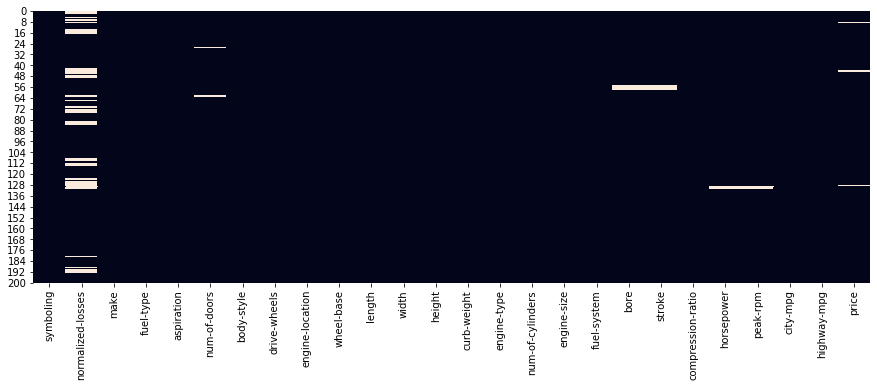

In [8]:
plt.figure(figsize = (15,5))
sns.heatmap(df_data.isnull(),cmap='rocket', cbar=False)

#### CONCLUSION: The black stripes in the plot depicts the null values in respected column which has to be normalized 

### Normalizing the dataset

In [9]:
df_temp = df_automobile[df_automobile['normalized-losses']!='?']  # selecting rows which doesn't have '?'

In [10]:
normalised_mean = df_temp['normalized-losses'].astype(int).mean()  # taking mean of that column

In [11]:
# replacing '?' with mean of that column
df_automobile['normalized-losses'] = df_automobile['normalized-losses'].replace('?',normalised_mean).astype(int)  

In [12]:
# Applying same method to normalize remaining columns in dataset

df_temp = df_automobile[df_automobile['price']!='?']
normalised_mean = df_temp['price'].astype(int).mean()
df_automobile['price'] = df_automobile['price'].replace('?',normalised_mean).astype(int)

In [13]:
df_temp = df_automobile[df_automobile['horsepower']!='?']
normalised_mean = df_temp['horsepower'].astype(int).mean()
df_automobile['horsepower'] = df_automobile['horsepower'].replace('?',normalised_mean).astype(int)

In [14]:
df_temp = df_automobile[df_automobile['peak-rpm']!='?']
normalised_mean = df_temp['peak-rpm'].astype(int).mean()
df_automobile['peak-rpm'] = df_automobile['peak-rpm'].replace('?',normalised_mean).astype(int)

In [15]:
df_temp = df_automobile[df_automobile['bore']!='?']
normalised_mean = df_temp['bore'].astype(float).mean()
df_automobile['bore'] = df_automobile['bore'].replace('?',normalised_mean).astype(float)


In [16]:
df_temp = df_automobile[df_automobile['stroke']!='?']
normalised_mean = df_temp['stroke'].astype(float).mean()
df_automobile['stroke'] = df_automobile['stroke'].replace('?',normalised_mean).astype(float)

In [17]:
df_automobile['num-of-doors'] = df_automobile['num-of-doors'].replace('?','four')

In [18]:
df_automobile.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

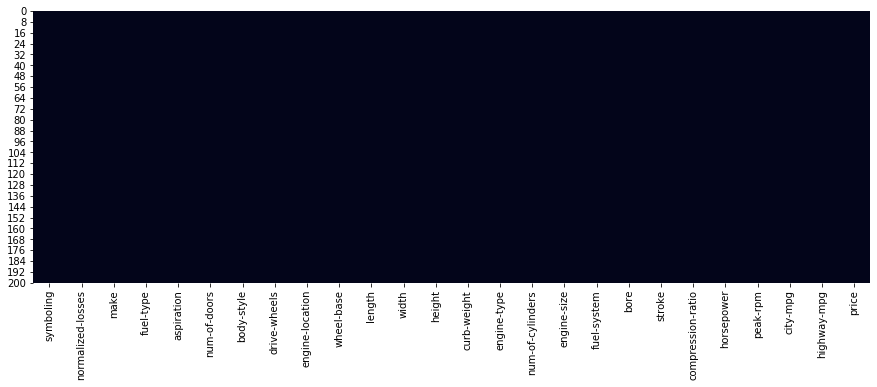

In [19]:
plt.figure(figsize = (15,5))
sns.heatmap(df_automobile.isnull(),cmap='rocket', cbar=False)

#### CONCLUSION: Clear plot implies zero null values in all cloumns

In [20]:
df_automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Furthur cleaning the dataset by converting the labels into numeric form so as to convert it into the machine-readable form

In [21]:
def engine_location_to_num(loc):
    if loc == 'front':
        return 1
    elif loc == 'rear':
        return 2

In [22]:
df_automobile['engine-location'] = df_automobile['engine-location'].apply(engine_location_to_num)

In [23]:
def drive_wheels_to_num(wheels):
    if wheels == 'rwd':
        return 1
    elif wheels == 'fwd':
        return 2
    elif wheels == '4wd':
        return 3
    return 0

In [24]:
df_automobile['drive-wheels'] = df_automobile['drive-wheels'].apply(drive_wheels_to_num)

In [25]:
def aspiration_num(asp):
    if asp == 'std':
        return 1
    elif asp == 'turbo':
        return 2

In [26]:
df_automobile['aspiration'] = df_automobile['aspiration'].apply(aspiration_num)

In [27]:
def body_style_to_num(fuel):
    if fuel == 'convertible':
        return 1
    elif fuel == 'hatchback':
        return 2
    elif fuel == 'sedan':
        return 3
    elif fuel == 'wagon':
        return 4
    elif fuel == 'hardtop':
        return 5
    return 0

In [28]:
df_automobile['body-style'] = df_automobile['body-style'].apply(body_style_to_num)

In [29]:
def fuel_type_to_num(fuel):
    if fuel == 'gas':
        return 1
    elif fuel == 'diesel':
        return 2

In [30]:
df_automobile["fuel-type"] = df_automobile["fuel-type"].apply(fuel_type_to_num)

In [31]:
def word_to_num(word):
    if type(word) != str:
        return word
    return w2n.word_to_num(word)

In [32]:
df_automobile['num-of-doors'] = df_automobile['num-of-doors'].apply(word_to_num)
df_automobile['num-of-cylinders'] = df_automobile['num-of-cylinders'].apply(word_to_num)

In [33]:
df_automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,1,1,2,1,1,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,1,1,2,1,1,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,1,1,2,2,1,1,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,1,1,4,3,2,1,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,1,1,4,3,3,1,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Exploratory data analysis

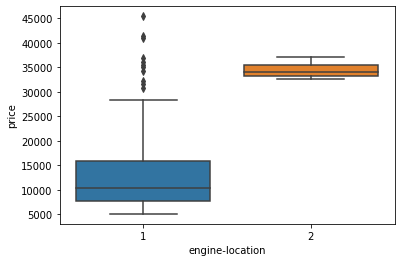

In [34]:
sns.boxplot(x="engine-location", y="price", data=df_automobile)

#### CONCLUSION: Following observations can be made from above plot
##### Majority of vehicles with engine location at front is cheaper than rear.
##### Most(75%) of the vehicles which has engine at front are in price range 5k - 15k approx.
##### Vehicles with engine at rear is in price range 32k - 39k approx.
##### Vehicles with engine location (front - 1, rear - 2) as 1 has wide price range compared to 2.  

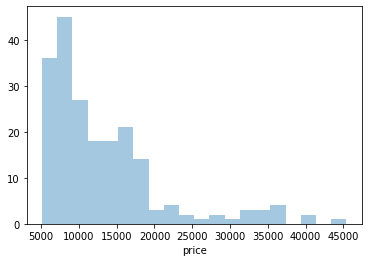

In [35]:
sns.distplot(df_automobile['price'], kde=False, bins=20)

#### CONCLUSION: 
#### We can see that the distribution of different vehicle price value present in the dataset and infer that most of the vehicle's price are between 5000 and 20000 approx.

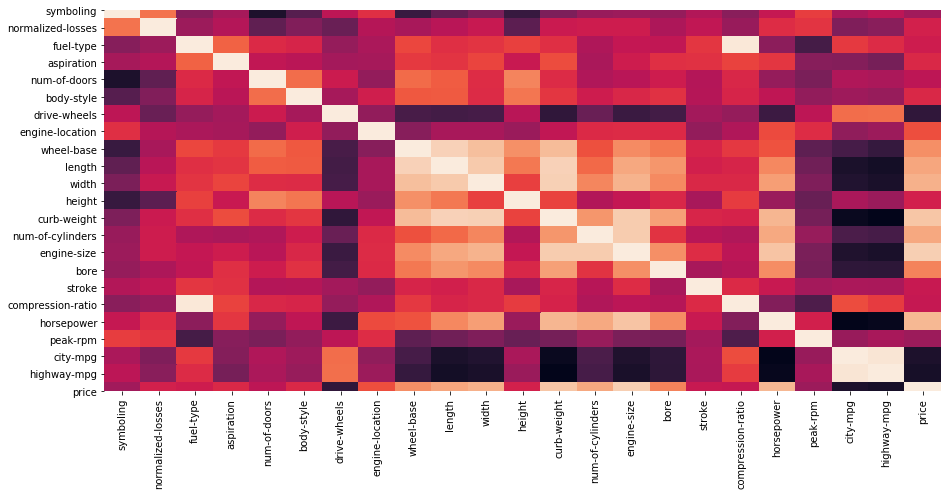

In [36]:
plt.figure(figsize=(15,7))
sns.heatmap(df_automobile.corr(), cbar=False)

#### CONCLUSION: Data points follow a roughly straight-line trend, the variables have an approximately linear relationship

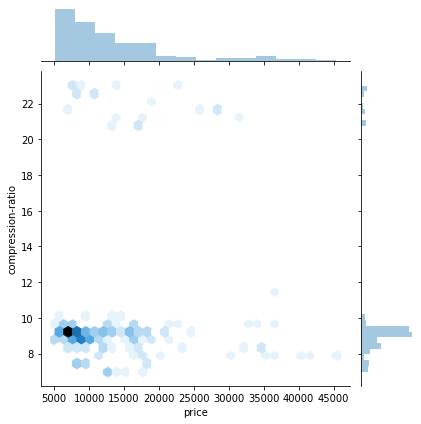

In [37]:
sns.jointplot(x='price',y='compression-ratio',data=df_automobile, kind='hex')

#### CONCLUSION:
#### Above plot depicts distribution compression ratio lies more at range 8-10 and had price range of 5k-10k approx

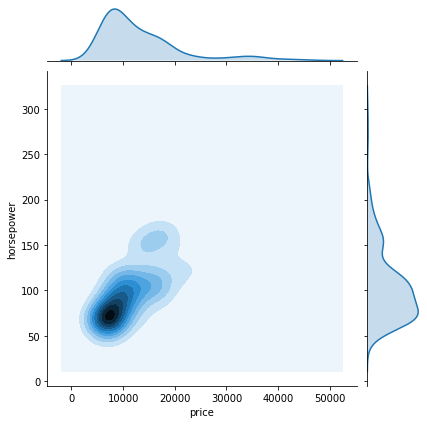

In [38]:
sns.jointplot(x='price',y='horsepower',data=df_automobile, kind='kde')

#### CONCLUSION:
#### Above plot depicts kernel density distribution of horsepower and price is concentrated more at price range of 5k-15k approx had horsepower of range 50-100hp

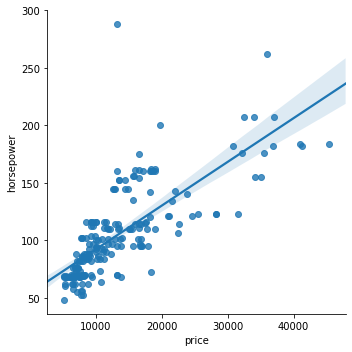

In [39]:
sns.lmplot(x='price',y='horsepower',data=df_automobile)

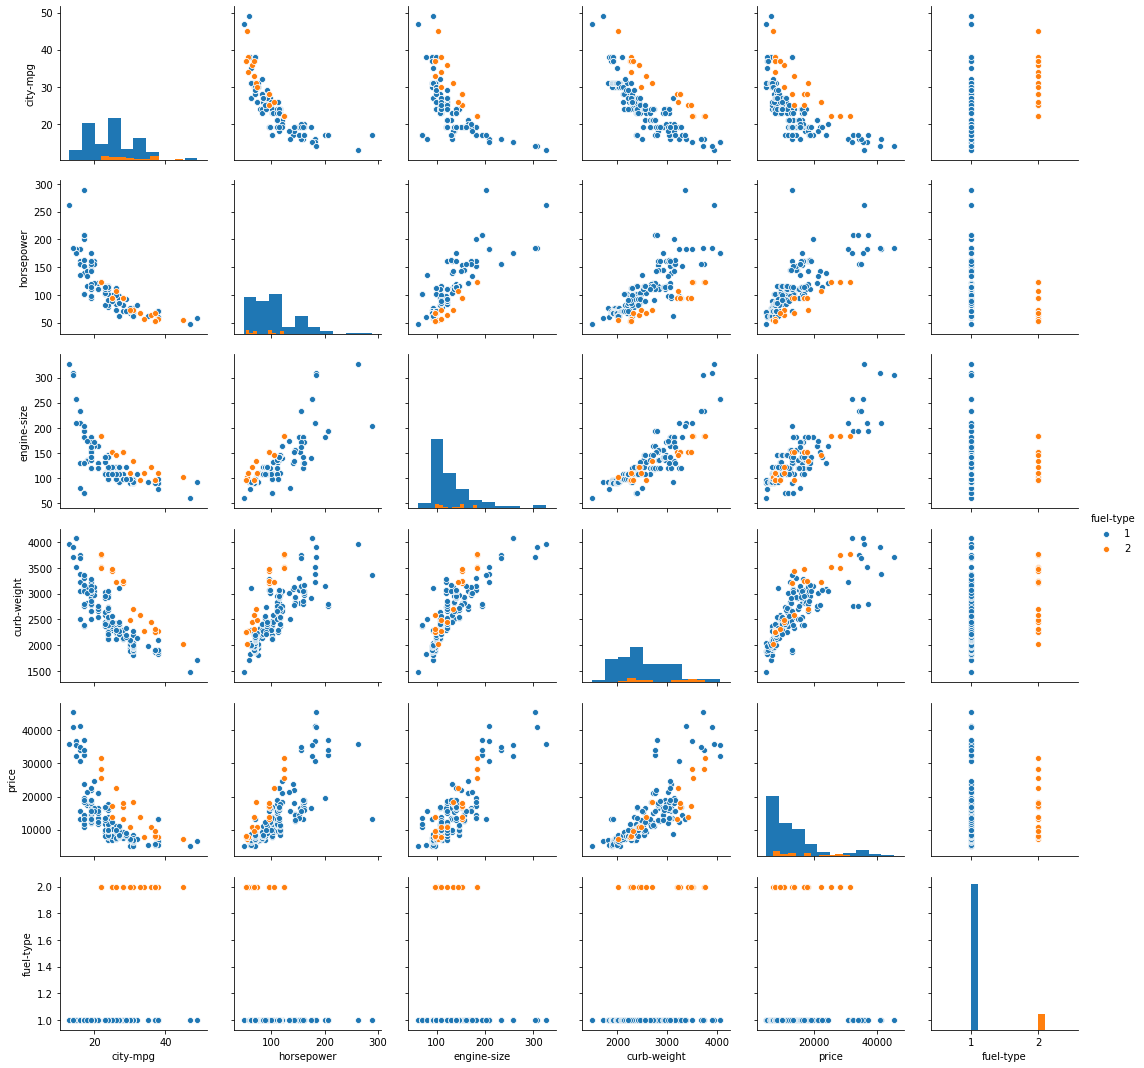

In [40]:
sns.pairplot(df_automobile[["city-mpg", "horsepower", "engine-size", "curb-weight","price", "fuel-type"]], hue="fuel-type", diag_kind="hist")

### Selecting feature and target columns

In [41]:
X = df_automobile.drop(['fuel-system','make','engine-type','price'], axis=1)
y = df_automobile['price']

### Splitting dataset as training and testing set

In [42]:
from sklearn.model_selection import train_test_split

## Linear regression model

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr = LinearRegression()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [46]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
y_pred = lr.predict(X_test)

In [48]:
pd.DataFrame({'Actual':y_test, 'predicted':y_pred}).head()

,Actual,predicted
90,7099,5868.547071
63,10795,10708.277867
32,5399,5759.209498
128,37028,33583.729078
44,13207,5166.148390


Text(0, 0.5, 'Predicted')

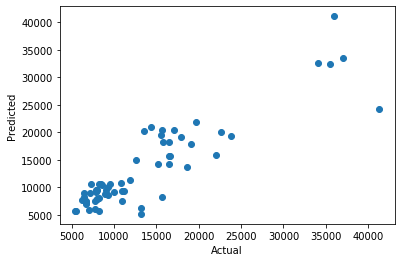

In [49]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [50]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [51]:
r2_score(y_test, y_pred)

0.7998429617478187

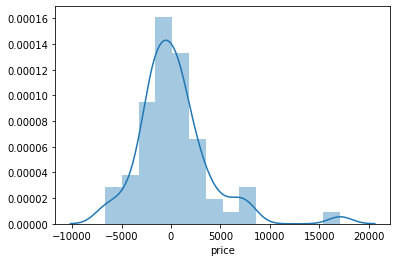

In [52]:
sns.distplot((y_test - y_pred))

In [53]:
from sklearn.externals import joblib 

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


#### Training multiple models to get model with best r2 score

In [64]:
best_r2 = 0 
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    if best_r2 < r2_score(y_test, y_pred):
        best_r2 = r2_score(y_test, y_pred)
        joblib.dump(lr, 'APP_Linear_model.pkl') 
print(best_r2)        

0.9115272179595636


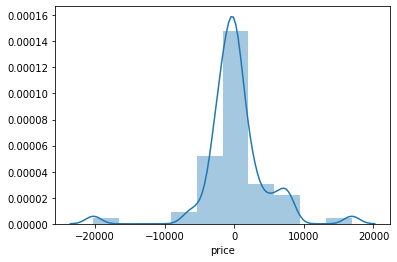

In [65]:
sns.distplot((y_test-y_pred),bins=10);

### CONCLUSION:
### Linear regression model performs at an accuracy of 91.1527% for given dataset

## SVM/SVR model

In [66]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

##### Using GridSearchCV to get best parameters 

In [67]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear']} 

In [68]:
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [69]:
grid.fit(X_train,y_train)

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.496, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.628, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.707, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.496, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.628, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.707, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1,

[CV] . C=100, gamma=0.0001, kernel=linear, score=-0.053, total=   6.5s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.748, total=   4.6s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.802, total=  12.3s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ..... C=1000, gamma=1, kernel=linear, score=-4.089, total=  13.6s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ...... C=1000, gamma=1, kernel=linear, score=0.607, total=  26.3s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ...... C=1000, gamma=1, kernel=linear, score=0.285, total=  27.8s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ... C=1000, gamma=0.1, kernel=linear, score=-4.089, total=  10.1s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  7.5min finished
C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [70]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [71]:
grid.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [72]:
grid_predictions = grid.predict(X_test)

In [73]:
r2_score(y_test, grid_predictions)

0.7748505096151855

### CONCLUSION:
### SVR model performs at an accuracy of 77.4850% for given dataset

## Decision tree and Random forest

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dtree = DecisionTreeClassifier()

In [88]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [89]:
dtree_pred = dtree.predict(X_test)

In [90]:
r2_score(y_test, dtree_pred)

0.8215562621256978

### CONCLUSION:
### Decision tree model performs at an accuracy of 82.1556% for given dataset
### this can furthur be improvised using ensemble of trees(random forest)

### Random forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [92]:
rfc_pred = rfc.predict(X_test)

In [93]:
r2_score(y_test, rfc_pred)

0.8515129887693224

#### Training multiple models to get model with best r2 score


In [99]:
best_rfc_r2 = 0 
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    rfc.fit(X_train, y_train)
    rfc_y_pred = rfc.predict(X_test)
    if best_rfc_r2 < r2_score(y_test, rfc_y_pred):
        best_rfc_r2 = r2_score(y_test, rfc_y_pred)
        joblib.dump(rfc, 'APP_RandomForest_model.pkl') 
print(best_rfc_r2)  

0.9342488492519411


### CONCLUSION:
### Random forest model performs at an accuracy of 93.4248% for given dataset

# FINAL CONCLUSION:

### Random forest model out performs Linear and SVR model to give best accuracy for given dataset with an r2 score of 0.934248 i.e., 93.4248% 